In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/linkedin-job-postings/postings.csv
/kaggle/input/linkedin-job-postings/companies/companies.csv
/kaggle/input/linkedin-job-postings/companies/company_industries.csv
/kaggle/input/linkedin-job-postings/companies/company_specialities.csv
/kaggle/input/linkedin-job-postings/companies/employee_counts.csv
/kaggle/input/linkedin-job-postings/mappings/industries.csv
/kaggle/input/linkedin-job-postings/mappings/skills.csv
/kaggle/input/linkedin-job-postings/jobs/benefits.csv
/kaggle/input/linkedin-job-postings/jobs/job_skills.csv
/kaggle/input/linkedin-job-postings/jobs/job_industries.csv
/kaggle/input/linkedin-job-postings/jobs/salaries.csv


In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv('/kaggle/input/linkedin-job-postings/postings.csv')
df.head()

,job_id,company_name,title,description,max_salary,pay_period,location,company_id,views,med_salary,...,skills_desc,listed_time,posting_domain,sponsored,work_type,currency,compensation_type,normalized_salary,zip_code,fips
0,921716,Corcoran Sawyer Smith,Marketing Coordinator,Job descriptionA leading real estate firm in N...,20.0,HOURLY,"Princeton, NJ",2774458.0,20.0,NaN,...,Requirements: \n\nWe are seeking a College or ...,1.713398e+12,NaN,0,FULL_TIME,USD,BASE_SALARY,38480.0,8540.0,34021.0
1,1829192,NaN,Mental Health Therapist/Counselor,"At Aspen Therapy and Wellness , we are committ...",50.0,HOURLY,"Fort Collins, CO",NaN,1.0,NaN,...,NaN,1.712858e+12,NaN,0,FULL_TIME,USD,BASE_SALARY,83200.0,80521.0,8069.0
2,10998357,The National Exemplar,Assitant Restaurant Manager,The National Exemplar is accepting application...,65000.0,YEARLY,"Cincinnati, OH",64896719.0,8.0,NaN,...,We are currently accepting resumes for FOH - A...,1.713278e+12,NaN,0,FULL_TIME,USD,BASE_SALARY,55000.0,45202.0,39061.0
3,23221523,"Abrams Fensterman, LLP",Senior Elder Law / Trusts and Estates Associat...,Senior Associate Attorney - Elder Law / Trusts...,175000.0,YEARLY,"New Hyde Park, NY",766262.0,16.0,NaN,...,This position requires a baseline understandin...,1.712896e+12,NaN,0,FULL_TIME,USD,BASE_SALARY,157500.0,11040.0,36059.0
4,35982263,NaN,Service Technician,Looking for HVAC service tech with experience ...,80000.0,YEARLY,"Burlington, IA",NaN,3.0,NaN,...,NaN,1.713452e+12,NaN,0,FULL_TIME,USD,BASE_SALARY,70000.0,52601.0,19057.0


In [5]:
df.columns

Index(['job_id', 'company_name', 'title', 'description', 'max_salary',
       'pay_period', 'location', 'company_id', 'views', 'med_salary',
       'min_salary', 'formatted_work_type', 'applies', 'original_listed_time',
       'remote_allowed', 'job_posting_url', 'application_url',
       'application_type', 'expiry', 'closed_time',
       'formatted_experience_level', 'skills_desc', 'listed_time',
       'posting_domain', 'sponsored', 'work_type', 'currency',
       'compensation_type', 'normalized_salary', 'zip_code', 'fips'],
      dtype='object')

In [6]:
df.isnull().sum()

job_id                             0
company_name                    1719
title                              0
description                        7
max_salary                     94056
pay_period                     87776
location                           0
company_id                      1717
views                           1689
med_salary                    117569
min_salary                     94056
formatted_work_type                0
applies                       100529
original_listed_time               0
remote_allowed                108603
job_posting_url                    0
application_url                36665
application_type                   0
expiry                             0
closed_time                   122776
formatted_experience_level     29409
skills_desc                   121410
listed_time                        0
posting_domain                 39968
sponsored                          0
work_type                          0
currency                       87776
c

In [7]:
df.describe()

,job_id,max_salary,company_id,views,med_salary,min_salary,applies,original_listed_time,remote_allowed,expiry,closed_time,listed_time,sponsored,normalized_salary,zip_code,fips
count,1.238490e+05,2.979300e+04,1.221320e+05,122160.000000,6280.000000,2.979300e+04,23320.000000,1.238490e+05,15246.0,1.238490e+05,1.073000e+03,1.238490e+05,123849.0,3.607300e+04,102977.000000,96434.000000
mean,3.896402e+09,9.193942e+04,1.220401e+07,14.618247,22015.619876,6.491085e+04,10.591981,1.713152e+12,1.0,1.716213e+12,1.712928e+12,1.713204e+12,0.0,2.053270e+05,50400.491887,28713.879887
std,8.404355e+07,7.011101e+05,2.554143e+07,85.903598,52255.873846,4.959738e+05,29.047395,4.848209e+08,0.0,2.321394e+09,3.622893e+08,3.989122e+08,0.0,5.097627e+06,30252.232515,16015.929825
min,9.217160e+05,1.000000e+00,1.009000e+03,1.000000,0.000000,1.000000e+00,1.000000,1.701811e+12,1.0,1.712903e+12,1.712346e+12,1.711317e+12,0.0,0.000000e+00,1001.000000,1003.000000
25%,3.894587e+09,4.828000e+01,1.435200e+04,3.000000,18.940000,3.700000e+01,1.000000,1.712863e+12,1.0,1.715481e+12,1.712670e+12,1.712886e+12,0.0,5.200000e+04,24112.000000,13121.000000
50%,3.901998e+09,8.000000e+04,2.269650e+05,4.000000,25.500000,6.000000e+04,3.000000,1.713395e+12,1.0,1.716042e+12,1.712670e+12,1.713408e+12,0.0,8.150000e+04,48059.000000,29183.000000
75%,3.904707e+09,1.400000e+05,8.047188e+06,8.000000,2510.500000,1.000000e+05,8.000000,1.713478e+12,1.0,1.716088e+12,1.713283e+12,1.713484e+12,0.0,1.250000e+05,78201.000000,42077.000000
max,3.906267e+09,1.200000e+08,1.034730e+08,9975.000000,750000.000000,8.500000e+07,967.000000,1.713573e+12,1.0,1.729125e+12,1.713562e+12,1.713573e+12,0.0,5.356000e+08,99901.000000,56045.000000


In [8]:
# Drop columns with too many missing values
df = df.drop(['application_url', 'application_type', 'closed_time', 'company_id',
              'zip_code', 'fips', 'job_posting_url', 'sponsored'], axis=1)

# Fill salary columns
df['min_salary'].fillna(df['min_salary'].median(), inplace=True)
df['max_salary'].fillna(df['max_salary'].median(), inplace=True)
df['normalized_salary'].fillna(df['normalized_salary'].median(), inplace=True)

# Drop rows with missing target
df.dropna(subset=['normalized_salary'], inplace=True)

# Drop text-heavy columns
df = df.drop(['description', 'skills_desc', 'title'], axis=1)

# Drop rows with few remaining nulls
df = df.dropna()

df.shape

(65, 20)

In [9]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
cat_cols = df.select_dtypes(include='object').columns

for col in cat_cols:
    df[col] = le.fit_transform(df[col])

In [10]:
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error

# Features & Target
X = df.drop('normalized_salary', axis=1)
y = df['normalized_salary']

In [11]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [12]:
# XGBoost Regressor
model = XGBRegressor()
model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [13]:
# Predict
y_pred = model.predict(X_test)

# Score
mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5
rmse

157909.19538757447

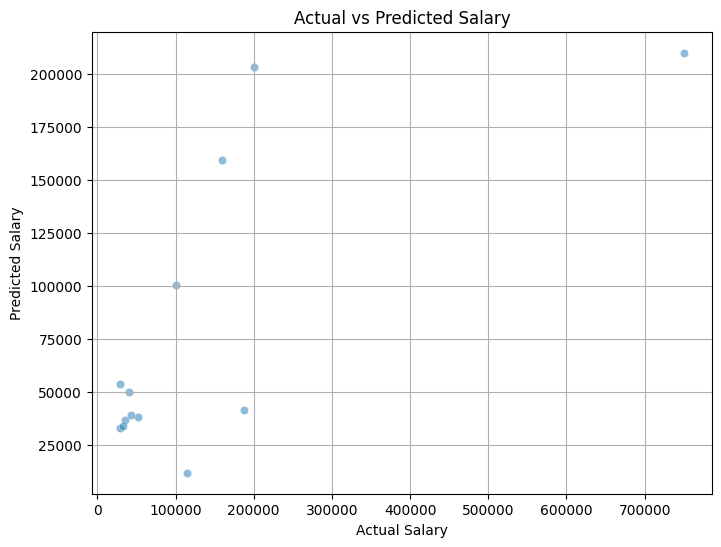

In [14]:
# Actual vs Predicted Salary
plt.figure(figsize=(8,6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.5)
plt.xlabel("Actual Salary")
plt.ylabel("Predicted Salary")
plt.title("Actual vs Predicted Salary")
plt.grid(True)
plt.show()